In [5]:
import cv2
import dlib
import numpy as np
import imutils
import random
from imutils import face_utils
import matplotlib.pyplot as plt
print(cv2.__version__)
%matplotlib inline

def features(img):
    #initialize facial detector
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray = cv2.resize(gray,(300,300))
#     img = cv2.resize(img,(300,300))
    
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
    rects = detector(gray,1)
    points = []
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print(len(rects))
    for (i,rect) in enumerate(rects):
        
        shape = predictor(gray,rect)
        shape = face_utils.shape_to_np(shape)


        (x,y,w,h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

        for (x,y) in shape:
            cv2.circle(img,(x,y),2,(0,0,255),-1)
            points.append((x,y))
            
#         points = np.asarray(list([p.x, p.y] for p in shape.parts()), dtype=np.int)
    return img,points


def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True
 
# Draw a point
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, cv2.FILLED, cv2.LINE_AA, 0 )
 
 
# Draw delaunay triangles
def draw_delaunay(img, delaunay_color):

	# Define colors for drawing.
	delaunay_color = (255,255,255)
	points_color = (0, 0, 255)

	img_orig = img.copy()
	 
	img,points = features(img)
	# print(len(points))

	# Rectangle to be used with Subdiv2D
	size = img.shape
	rect = (0, 0, size[1], size[0])
	 
	# Create an instance of Subdiv2D
	subdiv = cv2.Subdiv2D(rect);

	# Insert points into subdiv
	for p in points :
	    subdiv.insert(p)
	

	triangleList = subdiv.getTriangleList();
	size = img.shape
	r = (0, 0, size[1], size[0])
	triangle_points = []
	# print(len(triangleList))

	for t in triangleList :
	    
	    # print(t.shape) 
	    pt1 = (t[0], t[1])
	    pt2 = (t[2], t[3])
	    pt3 = (t[4], t[5])


	     
# 	    if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
	     
# 	        cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
# 	        cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
# 	        cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

# 	        triangle_points.append(t)

	for p in points :
	    draw_point(img, p, (0,0,255))

	return img,triangle_points

3.4.0


1
1


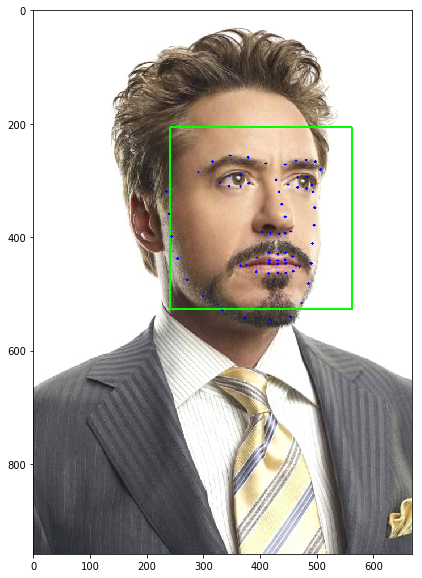

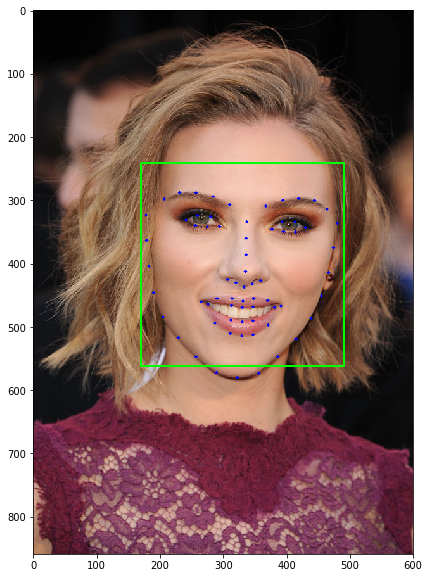

In [6]:
if __name__ == '__main__':
 
    # Read in the image.
    source = cv2.imread("../../TestSet/stark.jpg");
    
    target = cv2.imread("../../TestSet/Scarlett.jpg");
    
    # plt.rcParams["figure.figsize"] = (10,10)
    # plt.imshow(source)

    # plt.rcParams["figure.figsize"] = (10,10)
    # plt.imshow(target)
 

 
    # Draw delaunay triangles
    source_img,source_points = draw_delaunay( source, (255, 255, 255) );
    plt.figure(figsize=(20,10))
#     plt.subplot(121)
    plt.imshow(source_img)
    target_img,target_points = draw_delaunay( target, (255, 255, 255) );
    plt.figure(figsize=(20,10))
#     plt.subplot(122)
    plt.imshow(target_img)

